<a href="https://colab.research.google.com/github/MalcolmSlaney/PythonAuditoryToolbox/blob/main/Make_Standard_Clusters_and_Data_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Make clusters and process data
Read the data from the official spreadsheets, clean it, computer the HL clusters, and calculate the SII.  Save the cluster results (centroids) and a pickle file that has all the results of this processing.

##Imports

In [1]:
!rm -rf StanfordAudiology

In [2]:
!git clone https://github.com/MalcolmSlaney/StanfordAudiology.git

Cloning into 'StanfordAudiology'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 232 (delta 117), reused 93 (delta 42), pack-reused 24
Receiving objects: 100% (232/232), 197.44 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [3]:
# Import the packages needed for this Colab.
from collections import Counter
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
import sklearn
from typing import Dict, List, Optional, Union

# This next import is needed here to authenticate user for pulling
# spreadsheet data.

import google.colab as colab
from StanfordAudiology import clusters

In [4]:
colab.auth.authenticate_user

<function google.colab.auth.authenticate_user(clear_output=True, project_id=None)>

##Access our Google Drive with the data

In [5]:
# from google.colab import auth
from google.colab import drive
# from oauth2client.client import GoogleCredentials

In [6]:
# Mount my gDrive files
# OR this? https://stackoverflow.com/questions/48376580/how-to-read-data-in-google-colab-from-my-google-drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Create the standard clusters

In [7]:
# These defines allow us to change the Stanford Audiology. Since these are
# symbols defined in the clusters module, they aren't accessible in new versions
# of the functions defined here.  By duplicating these symbols into the current
# package the new code works like the old.

ReadData = clusters.ReadData
MakePandas = clusters.MakePandas
RemoveRowsWithBadAges = clusters.RemoveRowsWithBadAges
HLossClassifier = clusters.HLossClassifier
RemoveRowsWithBCWorseAC = clusters.RemoveRowsWithBCWorseAC
CreateKMeans = clusters.CreateKMeans
CreateClusterLabels = clusters.CreateClusterLabels
KMeansPredictions = clusters.KMeansPredictions
AssignClusterLabels = clusters.AssignClusterLabels
CountPredictions = clusters.CountPredictions
SaveAsJson = clusters.SaveAsJson

duplicate_column_name_v1 = clusters.duplicate_column_name_v1
labels_v1 = clusters.labels_v1
spreadsheet_path_v1 = clusters.spreadsheet_path_v1
default_cluster_dir = clusters.default_cluster_dir
golden_cluster_v1 = clusters.golden_cluster_v1
ChangeKeyValuesToInteger = clusters.ChangeKeyValuesToInteger

clusters.default_cluster_dir = '/content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/'

In [8]:
data_pickle_filename = os.path.join(clusters.default_cluster_dir, 'all_hl_data.pkl')
!rm {data_pickle_filename}

rm: cannot remove '/content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/all_hl_data.pkl': No such file or directory


In [9]:
if os.path.exists(data_pickle_filename):
  print(f'Loading standard data from {data_pickle_filename}...')
  saved_data_or_filename = pd.read_pickle(data_pickle_filename)
  print(f'  and it has shape {saved_data_or_filename.shape}')
else:
  saved_data_or_filename = clusters.spreadsheet_path_v1

In [10]:
!ls {clusters.default_cluster_dir}
clusters.default_cluster_dir

Cluster04Way.json  Cluster08Way.json  Cluster12Way.json  Cluster16Way.json  Cluster6Way.json
Cluster05Way.json  Cluster09Way.json  Cluster13Way.json  Cluster17Way.json  Cluster6Way.json.json
Cluster06Way.json  Cluster10Way.json  Cluster14Way.json  Cluster18Way.json  ClustersV1.json
Cluster07Way.json  Cluster11Way.json  Cluster15Way.json  Cluster19Way.json


'/content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/'

In [11]:
colab.auth.authenticate_user()

cluster_data_filename, all_data = clusters.CreateClusterV1(
    'ClustersV1',
    save_path=clusters.default_cluster_dir,
    spreadsheet_path=saved_data_or_filename)

Number of rows that have been dropped due to AC/BC differences:  0
all_data has 99 columns


In [12]:
!ls -l {cluster_data_filename}

-rw------- 1 root root 4530 Oct 28 01:55 /content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/ClustersV1.json


In [13]:
all_data.shape

(57718, 100)

In [14]:
all_data.columns

Index(['AgeAtTestDate', 'R125', 'R250', 'R500', 'R1000', 'R1500', 'R2000',
       'R3000', 'R4000', 'R6000', 'R8000', 'L125', 'L250', 'L500', 'L1000',
       'L1500', 'L2000', 'L3000', 'L4000', 'L6000', 'L8000', 'RBone125',
       'RBone250', 'RBone500', 'RBone1000', 'RBone1500', 'RBone2000',
       'RBone3000', 'RBone4000', 'RBone6000', 'RBone8000', 'LBone125',
       'LBone250', 'LBone500', 'LBone1000', 'LBone2000', 'LBone2000',
       'LBone3000', 'LBone4000', 'LBone6000', 'LBone8000', 'SRT_R',
       'DateOfTest', 'SRT_L', 'Word_Rec_Score_R', 'Headphones',
       'Word_Rec_Score_L', 'Word_Rec_Level_R', 'Word_Rec_Masking_R',
       'Word_Rec_Masking_L', 'Word_Rec_Level_L', 'TestLocation',
       'WordRecListRight', 'WordRecListLeft', 'MonSNR_Score_R',
       'MonSNR_Score_L', 'MonSNR_Right_Number_Lists', 'MonSNR_Level_R',
       'MonSNR_Left_Number_Lists', 'MonSNR_Level_L', 'TympPressure_L',
       'TympCompliance_L', 'TympType_R', 'TympVolume_L', 'TympVolume_R',
       'TympPressur

In [15]:
clusters.default_cluster_dir

'/content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/'

In [16]:
all_data

,AgeAtTestDate,R125,R250,R500,R1000,R1500,R2000,R3000,R4000,R6000,...,R_PTA_ABGap,R_HFPTA_ABGap,R_PTA_All_ABGap,L_PTA_ABGap,L_HFPTA_ABGap,L_PTA_All_ABGap,R_Type_HL_Mod,R_Type_HL_HF,R_Type_HL_All,predictions
0,58.0,NaN,55.0,60.0,60.0,NaN,60.0,50.0,45.0,50.0,...,46.666667,36.666666,41.25,5.416666,3.750000,6.00,Conductive,Conductive,Conductive,5
1,37.0,NaN,45.0,40.0,35.0,NaN,50.0,40.0,50.0,50.0,...,25.000002,28.333334,26.25,11.666668,7.500000,10.00,Conductive,Conductive,Conductive,5
2,25.0,NaN,20.0,15.0,15.0,NaN,15.0,20.0,25.0,30.0,...,10.000000,8.333334,10.00,20.833332,16.250000,19.50,Normal,Normal,Normal,1
3,49.0,NaN,15.0,15.0,20.0,NaN,10.0,0.0,0.0,0.0,...,10.000000,6.666667,7.50,3.333333,3.333333,3.75,Normal,Normal,Normal,2
4,47.0,NaN,15.0,15.0,10.0,NaN,5.0,10.0,15.0,15.0,...,1.666667,3.333333,3.75,NaN,6.666667,8.75,Normal,Normal,Normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76967,86.0,NaN,75.0,85.0,85.0,80.0,75.0,75.0,70.0,70.0,...,3.333328,1.666664,2.50,18.333336,18.333336,17.50,SNHL,SNHL,SNHL,4
76968,91.0,NaN,40.0,40.0,50.0,50.0,60.0,75.0,85.0,80.0,...,NaN,NaN,NaN,-1.250000,1.666668,0.25,Normal,Normal,Normal,0
76969,40.0,NaN,30.0,25.0,20.0,NaN,15.0,10.0,10.0,10.0,...,3.333334,0.000000,2.50,0.833334,2.500000,3.00,Normal,Normal,Normal,2
76972,75.0,NaN,20.0,25.0,30.0,NaN,40.0,45.0,55.0,60.0,...,NaN,-8.333332,-12.50,2.500000,7.500000,4.75,Normal,SNHL,SNHL,3


In [17]:
random_state = 0
max_iter = 1000
n_init = 10
ref_cluster = golden_cluster_v1

for n in range(4,21):
  print(f'{n}-way clustering...')
  # Create and apply K-means clustering
  kmeans = clusters.CreateKMeans(n, all_data[clusters.labels_v1], random_state, max_iter, n_init)
  # cluster_labels = CreateClusterLabels(kmeans, ref_cluster)
  cluster_ids = clusters.KMeansPredictions(kmeans, all_data[clusters.labels_v1])
  all_data[f'Cluster{n:02}Way'] = cluster_ids

4-way clustering...
5-way clustering...
6-way clustering...
7-way clustering...
8-way clustering...
9-way clustering...
10-way clustering...
11-way clustering...
12-way clustering...
13-way clustering...
14-way clustering...
15-way clustering...
16-way clustering...
17-way clustering...
18-way clustering...
19-way clustering...
20-way clustering...


In [18]:
CountPredictions(all_data, cluster_field='Cluster20Way')

Counter({7: 1729,
         0: 1728,
         4: 2904,
         12: 7102,
         14: 7427,
         1: 2938,
         10: 1348,
         18: 1806,
         16: 2727,
         17: 3020,
         11: 3994,
         15: 2627,
         13: 2707,
         5: 3259,
         19: 1394,
         8: 3079,
         2: 2119,
         9: 2910,
         3: 941,
         6: 1959})

##Add the Speech Intelligibility Index before saving

In [19]:
!pip install speech_intelligibility_index

In [20]:
from speech_intelligibility_index import sii

In [21]:
default_audiogram_freqs = [125, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 6000, 8000]

def sii_from_audiogram(
    audiogram_samples: Union[List[float], np.ndarray],
    audiogram_freqs: Union[List[float], np.ndarray] = default_audiogram_freqs) -> float:
    """Compute the speech intelligibility index from an audiogram

    Args:
      audiogram_samples: Hearing loss in db at frequencies corresponding to the
        next argument
      audiogram_freqs: Frequencies (Hz) where audiogram is measured
    Returns:
      a float, the corresponding speech intelligibility index
    """
    audiogram_samples = np.asarray(audiogram_samples)
    audiogram_freqs = np.asarray(audiogram_freqs)
    assert audiogram_samples.ndim == 1
    assert audiogram_freqs.ndim == 1
    assert audiogram_samples.shape[0] == audiogram_freqs.shape[0]

    # Interpolate from the supplied audiogram frequencies to the critical
    interp_func = interpolate.interp1d(audiogram_freqs, audiogram_samples,
                                       kind='quadratic',
                                       fill_value='extrapolate')
    critical_band_hl = interp_func(sii.mid_band_freqs)

    [ssl, nsl, hearing_threshold] = sii.input_5p1(ssl='normal')
    return sii.sii(ssl=ssl, nsl=nsl, hearing_threshold=critical_band_hl)

In [22]:
audiogram_freqs = [int(f[1:]) for f in clusters.labels_v1]
audiogram_freqs

[250, 500, 1000, 2000, 3000, 4000, 6000, 8000]

In [23]:
all_siis = []
hl_thresholds = all_data[clusters.labels_v1].values

for i in range(hl_thresholds.shape[0]):
  all_siis.append(sii_from_audiogram(hl_thresholds[i, :], audiogram_freqs))

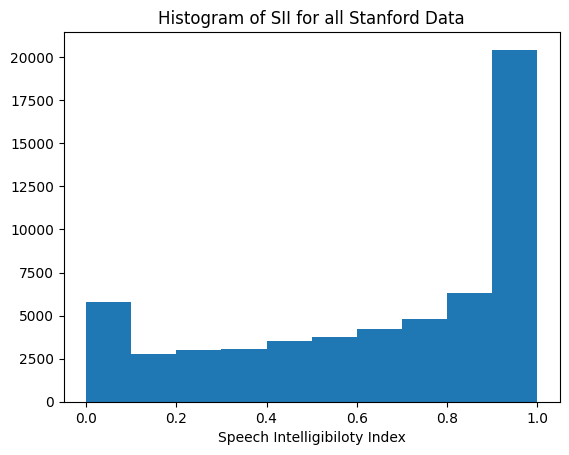

In [24]:
plt.hist(all_siis)
plt.xlabel('Speech Intelligibiloty Index')
plt.title('Histogram of SII for all Stanford Data');

In [25]:
all_data['sii_estimate'] = all_siis

##Save the whole data set for easier retrieval

In [26]:
all_data.columns

Index(['AgeAtTestDate', 'R125', 'R250', 'R500', 'R1000', 'R1500', 'R2000',
       'R3000', 'R4000', 'R6000',
       ...
       'Cluster12Way', 'Cluster13Way', 'Cluster14Way', 'Cluster15Way',
       'Cluster16Way', 'Cluster17Way', 'Cluster18Way', 'Cluster19Way',
       'Cluster20Way', 'sii_estimate'],
      dtype='object', length=118)

In [27]:
data_pickle_filename = os.path.join(clusters.default_cluster_dir, 'all_hl_data.pkl')
all_data.to_pickle(data_pickle_filename)

print(f'All HL data, cluster classifictions, and SII are at {data_pickle_filename}')

All HL data, cluster classifictions, and SII are at /content/gdrive/Shareddrives/StanfordAudiology/ColabNotebooks/all_hl_data.pkl


##Load and display cluster data

In [28]:
kmeans_6, feature_labels_6, all_features6 = clusters.LoadFromJson(cluster_data_filename)

In [29]:
kmeans_6

KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=0)

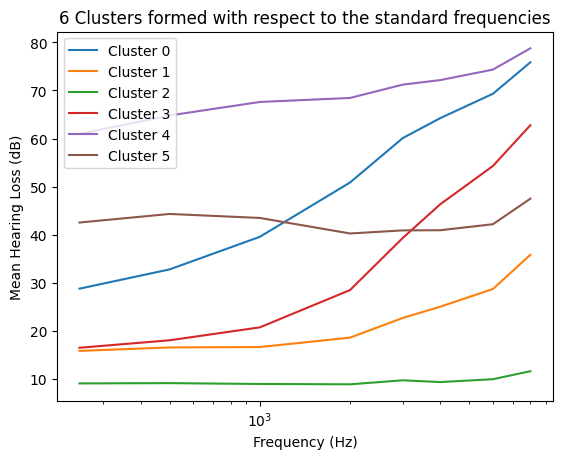

In [30]:
clusters.PlotClusterCenters(feature_labels_6, kmeans_6, None, 6)